In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('ushape.csv')

new_column_names = {
    '3.159499363321345566e-02': 'X',
    '9.869877579082642072e-01': 'Y',
    '0.000000000000000000e+00': 'Class'
}

df = df.rename(columns=new_column_names)

In [74]:
df.head()

,X,Y,Class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


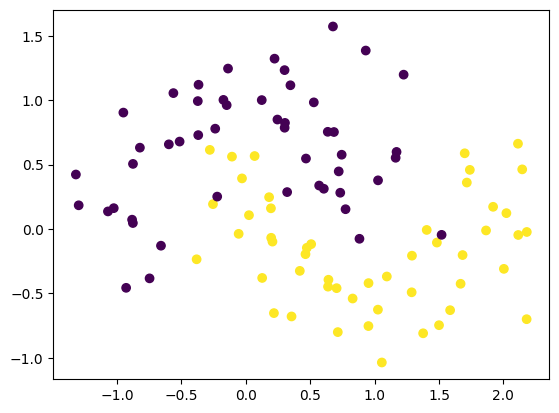

In [75]:
import matplotlib.pyplot as plt
plt.scatter(df['X'],df['Y'],c=df['Class'])

## Case 1 - Zero Intialization

In [76]:
X = df.iloc[:,0:2].values
Y = df.iloc[:,-1].values
X.shape,Y.shape

((99, 2), (99,))

In [77]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

### Relu

In [78]:
model1 = Sequential()
model1.add(Dense(10,activation='relu',input_dim=2))
model1.add(Dense(1,activation='relu'))

In [79]:
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [80]:
# Set parameter to zero
model1.get_weights()

[array([[ 0.03736049,  0.09819657,  0.5559065 ,  0.597168  , -0.5880372 ,
          0.16685331,  0.55375713,  0.3638869 , -0.28333017,  0.18822783],
        [ 0.18526101,  0.01649714, -0.6838452 , -0.5777045 , -0.1322723 ,
         -0.24403867,  0.6978987 , -0.4759121 ,  0.33476108, -0.3204462 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.12799299],
        [-0.64606285],
        [ 0.23271531],
        [ 0.47022504],
        [ 0.37500376],
        [-0.6337055 ],
        [ 0.26499325],
        [-0.53218806],
        [-0.4269655 ],
        [ 0.15261602]], dtype=float32),
 array([0.], dtype=float32)]

In [81]:
initial_weights = model1.get_weights()

In [82]:
initial_weights[0] = np.zeros(model1.get_weights()[0].shape)
initial_weights[1] = np.zeros(model1.get_weights()[1].shape)
initial_weights[2] = np.zeros(model1.get_weights()[2].shape)
initial_weights[3] = np.zeros(model1.get_weights()[3].shape)

In [83]:
model1.set_weights(initial_weights)

In [84]:
model1.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [85]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [86]:
history = model1.fit(X,Y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4968 - loss: 8.1101 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5046 - loss: 7.9841 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4578 - loss: 8.7397 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5125 - loss: 7.8582 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5046 - loss: 7.9841 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5437 - loss: 7.3545 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5086 - loss: 7.9212 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4500 - loss: 8.8656 - val_accuracy: 0.5000 - val_loss: 8.0590

In [87]:
model1.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 186us/step


<Axes: >

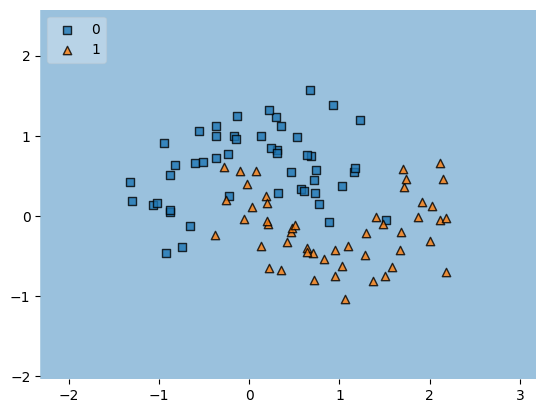

In [88]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y.astype('int'), clf=model1, legend=2)

### Sigmoid

In [89]:
model1_sigmoid = Sequential()
model1_sigmoid.add(Dense(10,activation='sigmoid',input_dim=2))
model1_sigmoid.add(Dense(1,activation='sigmoid'))

model1_sigmoid.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [90]:
# set weights to zero
model1_sigmoid.get_weights()

[array([[-0.08200616,  0.695453  , -0.26260486, -0.24572   , -0.00504327,
         -0.51447916,  0.02557558, -0.03998506,  0.5946676 , -0.0824433 ],
        [-0.53102213, -0.44583693, -0.24475232, -0.28382447, -0.30726755,
          0.29122764, -0.5712612 , -0.6367711 ,  0.48734742,  0.703468  ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.33380657],
        [-0.73738414],
        [ 0.49673003],
        [ 0.6616575 ],
        [-0.5918294 ],
        [ 0.37966186],
        [-0.46516442],
        [-0.57122797],
        [-0.20571905],
        [-0.09906703]], dtype=float32),
 array([0.], dtype=float32)]

In [91]:
initial_weights = model1_sigmoid.get_weights()

initial_weights[0] = np.zeros(model1_sigmoid.get_weights()[0].shape)
initial_weights[1] = np.zeros(model1_sigmoid.get_weights()[1].shape)
initial_weights[2] = np.zeros(model1_sigmoid.get_weights()[2].shape)
initial_weights[3] = np.zeros(model1_sigmoid.get_weights()[3].shape)

In [92]:
model1_sigmoid.set_weights(initial_weights)
model1_sigmoid.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [93]:
model1_sigmoid.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model1_sigmoid.fit(X,Y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4905 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4914 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5227 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4954 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4993 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4993 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5071 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4836 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931

In [94]:
model1_sigmoid.get_weights()

[array([[ 0.43173936,  0.43173936,  0.43173936,  0.43173936,  0.43173936,
          0.43173936,  0.43173936,  0.43173936,  0.43173936,  0.43173936],
        [-0.47235268, -0.47235268, -0.47235268, -0.47235268, -0.47235268,
         -0.47235268, -0.47235268, -0.47235268, -0.47235268, -0.47235268]],
       dtype=float32),
 array([-0.14364295, -0.14364295, -0.14364295, -0.14364295, -0.14364295,
        -0.14364295, -0.14364295, -0.14364295, -0.14364296, -0.14364296],
       dtype=float32),
 array([[0.06580348],
        [0.06580348],
        [0.06580348],
        [0.06580348],
        [0.06580348],
        [0.06580348],
        [0.06580348],
        [0.06580348],
        [0.06580348],
        [0.06580348]], dtype=float32),
 array([-0.0709731], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 190us/step


<Axes: >

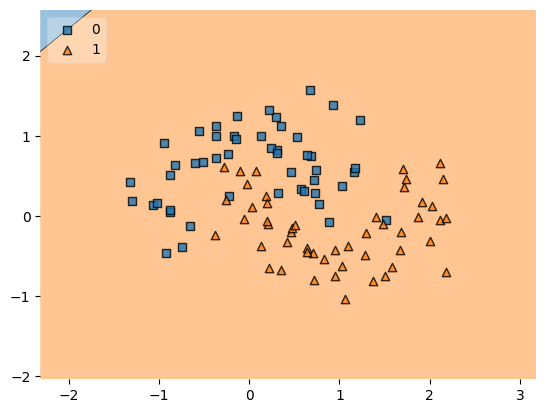

In [95]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y.astype('int'), clf=model1_sigmoid, legend=2)

## Case 2 - Non zero constant value using sigmoid

In [96]:
model2 = Sequential()
model2.add(Dense(10,activation='sigmoid',input_dim=2))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [97]:
model2.get_weights()

[array([[-0.39408484,  0.35165793, -0.40936813,  0.4571131 ,  0.23680627,
         -0.4394527 ,  0.1199742 ,  0.00798315, -0.06716877,  0.36107963],
        [ 0.6050448 , -0.6403232 , -0.5378231 , -0.33878833,  0.64602655,
         -0.546281  , -0.30903855, -0.3805437 , -0.6528228 ,  0.28842282]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.4681612 ],
        [-0.6344961 ],
        [ 0.51375   ],
        [-0.6285601 ],
        [ 0.65863687],
        [-0.32939872],
        [ 0.28560597],
        [-0.48870718],
        [-0.25966054],
        [ 0.6209945 ]], dtype=float32),
 array([0.], dtype=float32)]

In [98]:
initial_weights = model2.get_weights()

initial_weights[0] = np.ones(model2.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model2.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model2.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model2.get_weights()[3].shape)*0.5

model2.set_weights(initial_weights)
model2.get_weights()

[array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]], dtype=float32),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [99]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model2.fit(X,Y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4758 - loss: 2.1477 - val_accuracy: 0.5000 - val_loss: 1.8429
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5422 - loss: 1.8415 - val_accuracy: 0.5000 - val_loss: 1.8306
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5110 - loss: 1.9601 - val_accuracy: 0.5000 - val_loss: 1.8183
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5032 - loss: 1.9514 - val_accuracy: 0.5000 - val_loss: 1.8060
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5032 - loss: 1.9445 - val_accuracy: 0.5000 - val_loss: 1.7939
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5110 - loss: 1.8988 - val_accuracy: 0.5000 - val_loss: 1.7818
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4993 - loss: 1.9526 - val_accuracy: 0.5000 - val_loss: 1.7697
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5071 - loss: 1.9006 - val_accuracy: 0.5000 - val_loss: 1.757

In [100]:
model2.get_weights()

[array([[0.4391888 , 0.4391888 , 0.4391888 , 0.4391888 , 0.4391888 ,
         0.4391888 , 0.4391888 , 0.4391888 , 0.4391888 , 0.4391888 ],
        [0.24665967, 0.24665967, 0.24665967, 0.24665967, 0.24665967,
         0.24665967, 0.24665967, 0.24665967, 0.24665967, 0.24665967]],
       dtype=float32),
 array([0.25794235, 0.25794235, 0.25794235, 0.25794235, 0.25794235,
        0.25794235, 0.25794235, 0.25794235, 0.25794235, 0.25794235],
       dtype=float32),
 array([[0.232745],
        [0.232745],
        [0.232745],
        [0.232745],
        [0.232745],
        [0.232745],
        [0.232745],
        [0.232745],
        [0.232745],
        [0.232745]], dtype=float32),
 array([0.22443525], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 186us/step


<Axes: >

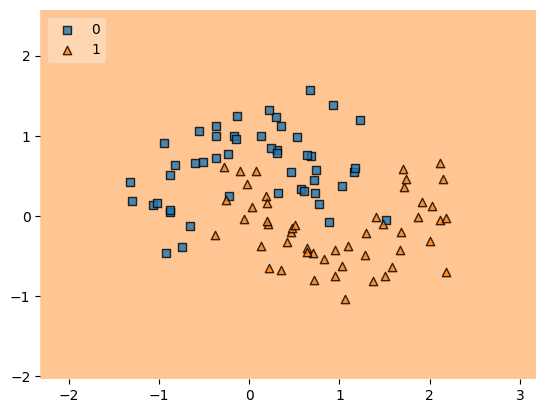

In [101]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y.astype('int'), clf=model2, legend=2)

## Case 3 - Random Intialization with samll weights
## Case 4 - Random Intialization with large weights

# Solution
### **1. Xavier / Glorot Intialization**(tanh, sigmoid)
#### **1.1 glorot_normal**

#### **1.2 glorot_uniform**
### **2. He Intialization**(Relu)
#### **2.1 he_normal**

#### **2.2 he_uniform**

In [102]:
model_glorat = Sequential()

model_glorat.add(Dense(10,activation='tanh',input_dim=2,kernel_initializer='glorot_normal'))
model_glorat.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
model_glorat.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
model_glorat.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
model_glorat.add(Dense(1,activation='sigmoid'))

model_glorat.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
model_glorat.get_weights()

[array([[-0.26646632, -0.3084901 , -0.3322749 , -0.5661516 , -0.08893149,
         -0.8967736 , -0.2508449 , -0.14679237,  0.18128389, -0.12123301],
        [ 0.18962048,  0.42672226, -0.42058495, -0.69680136, -0.89131993,
          0.25497425,  0.4952576 , -0.55203   , -0.00270252, -0.00621793]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.24450366, -0.14774176,  0.14056943, -0.40031055, -0.00873985,
          0.40581292,  0.14472915, -0.0669223 ,  0.1379021 , -0.42079476],
        [-0.3218217 , -0.40223688, -0.4119766 , -0.46197465,  0.0227211 ,
          0.09375276,  0.13392988, -0.1711935 ,  0.59805495, -0.16712993],
        [-0.5194129 , -0.40082383, -0.03949775,  0.38615778,  0.42264602,
         -0.150734  ,  0.12318797, -0.64530295, -0.38275713, -0.45787567],
        [-0.27278358, -0.46541902,  0.44172567,  0.44331732,  0.12030301,
         -0.09221969,  0.15692073, -0.23287532,  0.22096997, -0.25389293],
        [-0.06789

In [104]:
initial_weights = model_glorat.get_weights()

initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model_glorat.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model_glorat.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model_glorat.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model_glorat.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model_glorat.get_weights()[9].shape)

model_glorat.set_weights(initial_weights)
model_glorat.get_weights()

[array([[-1.0850741 , -0.3313138 , -0.2950367 ,  0.42990687, -0.79969096,
         -0.16508004, -1.1594659 ,  0.6943633 ,  0.12554681,  0.6381485 ],
        [ 0.6631779 , -0.809013  , -0.65893173, -0.49738955,  0.6265437 ,
         -1.9641604 ,  0.43443203,  0.39041087,  0.6459077 ,  0.5833964 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.50379956, -0.0423159 , -0.023016  ,  0.28509453,  0.08541459,
         -0.644004  ,  0.25080785,  0.26215908,  0.03801073,  0.13578396],
        [-0.27927843,  0.12627314,  0.5985086 ,  0.25046977, -0.06184913,
         -0.1857191 , -0.34887338,  0.35920838, -0.18820445,  0.28328636],
        [ 0.47878817,  0.02901541, -0.12732852,  0.22441165,  0.18252033,
         -0.37873286, -0.11159233,  0.6291112 , -0.05853885, -0.21200953],
        [-0.29643583,  0.3631014 ,  0.30429497,  0.2334292 , -0.5063017 ,
         -0.29012167, -0.36697719, -0.07173511, -0.36486617,  0.37742135],
        [ 0.35436

In [105]:
model_glorat.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model_glorat.fit(X,Y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4993 - loss: 0.6965 - val_accuracy: 0.3500 - val_loss: 0.7217
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5534 - loss: 0.6865 - val_accuracy: 0.4000 - val_loss: 0.7114
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6046 - loss: 0.6781 - val_accuracy: 0.4500 - val_loss: 0.7008
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6461 - loss: 0.6640 - val_accuracy: 0.5000 - val_loss: 0.6899
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6831 - loss: 0.6620 - val_accuracy: 0.5500 - val_loss: 0.6785
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6528 - loss: 0.6654 - val_accuracy: 0.7000 - val_loss: 0.6668
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6997 - loss: 0.6432 - val_accuracy: 0.7000 - val_loss: 0.6552
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7075 - loss: 0.6370 - val_accuracy: 0.7500 - val_loss: 0.6431

In [106]:
model_glorat.get_weights()

[array([[-0.87178016, -0.23605727, -0.21518743,  0.49398625, -0.7380495 ,
         -0.02583206, -0.9346916 ,  0.58206433,  0.02777477,  0.52693194],
        [ 0.7554044 , -0.88233316, -0.7206471 , -0.64136755,  0.65500367,
         -2.0006354 ,  0.6635027 ,  0.5307405 ,  0.7245975 ,  0.48035485]],
       dtype=float32),
 array([ 0.1854331 ,  0.03993032,  0.08510485, -0.05237053,  0.00426097,
         0.09023876,  0.1953708 ,  0.23280227, -0.03831541, -0.19107929],
       dtype=float32),
 array([[ 4.8310107e-01, -1.6244502e-01, -1.2128544e-01,  2.0077771e-01,
          5.6309324e-02, -6.1968184e-01,  3.5205290e-01,  2.2621416e-01,
          1.4525019e-01,  2.9152441e-01],
        [-2.9861125e-01,  6.4659730e-02,  5.7477844e-01,  2.5333136e-01,
         -9.4804734e-02, -2.6099366e-01, -3.1240475e-01,  3.5329315e-01,
         -1.9089356e-01,  1.9641763e-01],
        [ 4.6483174e-01, -4.8535340e-02, -1.6116124e-01,  2.1672226e-01,
          1.4380962e-01, -4.6482569e-01, -5.9721947e-02,  6

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 205us/step


<Axes: >

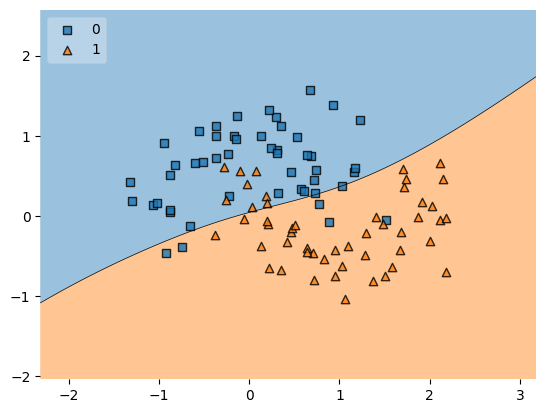

In [107]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y.astype('int'), clf=model_glorat, legend=2)

### He

In [108]:
model_he = Sequential()

model_he.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model_he.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model_he.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model_he.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model_he.add(Dense(1,activation='sigmoid'))

model_he.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [109]:
initial_weights = model_he.get_weights()

initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model_he.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model_he.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model_he.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model_he.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model_he.get_weights()[9].shape)

model_he.set_weights(initial_weights)
model_he.get_weights()

[array([[-0.18666053,  0.5406247 , -1.2515664 , -1.9966569 ,  0.6494927 ,
          1.2963141 ,  0.30880564,  0.4387695 , -0.43636808,  0.50210434],
        [ 0.07038805, -0.03366114, -0.2590039 , -0.13494413, -0.6595879 ,
         -0.7030467 , -0.25689602,  0.34320584, -0.4058982 ,  0.11795422]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.0222635 ,  0.2053329 ,  0.56900173, -0.15719402,  0.31386748,
         -0.10527693, -0.0875707 ,  0.19964042, -0.10195641, -0.13939045],
        [-0.17436165,  0.14033505, -0.06849653,  0.5327552 ,  0.41574824,
          0.5555376 ,  0.33600372, -0.35766977, -0.05123338, -0.03452381],
        [ 0.40438384, -0.21271494,  0.189995  ,  0.0864889 , -0.51286536,
          0.09722717, -0.22921915, -0.1608887 , -0.40385073, -0.66582096],
        [ 0.3287432 , -0.38853672,  0.05528295,  0.169978  , -0.22623608,
         -0.24681048, -0.03965043, -0.25426295, -0.12957875, -0.04946903],
        [ 0.45016

In [110]:
model_he.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model_he.fit(X,Y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5539 - loss: 0.6997 - val_accuracy: 0.5000 - val_loss: 0.7175
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5188 - loss: 0.6977 - val_accuracy: 0.5000 - val_loss: 0.7127
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5236 - loss: 0.6964 - val_accuracy: 0.5500 - val_loss: 0.7077
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5056 - loss: 0.6934 - val_accuracy: 0.5500 - val_loss: 0.7026
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6027 - loss: 0.6852 - val_accuracy: 0.5500 - val_loss: 0.6971
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4978 - loss: 0.6850 - val_accuracy: 0.5500 - val_loss: 0.6917
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5446 - loss: 0.6797 - val_accuracy: 0.5000 - val_loss: 0.6866
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5071 - loss: 0.6768 - val_accuracy: 0.5000 - val_loss: 0.682

In [111]:
model_he.get_weights()

[array([[-0.02813999,  0.5390324 , -1.3080249 , -2.0899372 ,  0.77278423,
          1.4180964 ,  0.42514625,  0.46283865, -0.3570743 ,  0.48839742],
        [ 0.33358058,  0.2260962 , -0.19032556, -0.21483888, -0.9080158 ,
         -0.7233933 , -0.5209455 ,  0.2076611 , -0.22581589,  0.4057223 ]],
       dtype=float32),
 array([ 0.13251851,  0.07618101, -0.09154586,  0.02638317,  0.07154701,
         0.16650733,  0.14780919, -0.00021391, -0.17907779,  0.05333159],
       dtype=float32),
 array([[-0.16991085,  0.18954693,  0.8084657 ,  0.09099001,  0.28956577,
          0.11860936, -0.15413736,  0.09385293, -0.20012963, -0.13939045],
        [-0.01998467,  0.03372808, -0.05008792,  0.5975346 ,  0.33601165,
          0.6328337 ,  0.26763323, -0.396363  ,  0.08712003, -0.03452381],
        [ 0.24920508, -0.21271494,  0.40840322,  0.34537452, -0.6092697 ,
          0.01203003, -0.22921915, -0.1608887 , -0.24514611, -0.66582096],
        [ 0.18507938, -0.38853672,  0.2818896 ,  0.42711225, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 207us/step


<Axes: >

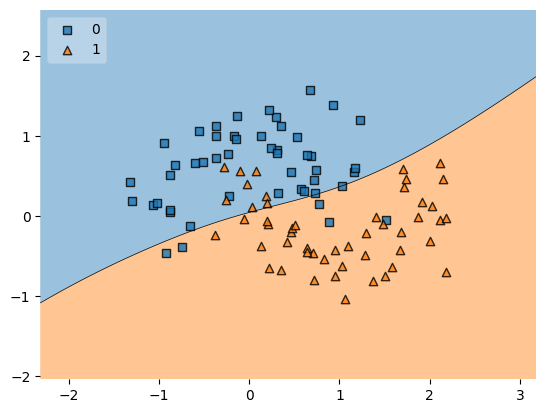

In [112]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y.astype('int'), clf=model_glorat, legend=2)